# Data Science amb Python


## Sprint 8 - Tasca del test d'hipòtesis

#### Cristiane de Souza da Silva

Abril 2021

#### Exercises 1


Grab a sports theme dataset you like and select an attribute from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

In [1]:
# import libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset 
from datetime import datetime


games = pd.read_csv('athlete_olympics.csv')

games.head()

,ID,Sex,Age,Height,Weight,NOC,Season,Medal
0,1,M,24.0,180.0,80.0,CHN,Summer,NaN
1,2,M,23.0,170.0,60.0,CHN,Summer,NaN
2,3,M,24.0,NaN,NaN,DEN,Summer,NaN
3,4,M,34.0,NaN,NaN,DEN,Summer,Gold
4,5,F,21.0,185.0,82.0,NED,Winter,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   NOC     271116 non-null  object 
 6   Season  271116 non-null  object 
 7   Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 16.5+ MB


In [4]:
# Replace the Age, Height and Weight NaN by their median.

games['Age'].fillna(games['Age'].median(), inplace=True)

games['Height'].fillna(games['Height'].median(), inplace=True)

games['Weight'].fillna(games['Weight'].median(), inplace=True)

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Sex     271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   NOC     271116 non-null  object 
 6   Season  271116 non-null  object 
 7   Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 16.5+ MB


In [6]:
#Replace 'Medal' column Values with Zeros and 1

games['Medal'] = games['Medal'].fillna(0)
games['Medal'] =games['Medal'].replace(['Gold', 'Bronze', 'Silver'], [1, 1, 1])
games.head()

,ID,Sex,Age,Height,Weight,NOC,Season,Medal
0,1,M,24.0,180.0,80.0,CHN,Summer,0
1,2,M,23.0,170.0,60.0,CHN,Summer,0
2,3,M,24.0,175.0,70.0,DEN,Summer,0
3,4,M,34.0,175.0,70.0,DEN,Summer,1
4,5,F,21.0,185.0,82.0,NED,Winter,0


In [7]:
# show summary of Dataframe structure

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Sex     271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   NOC     271116 non-null  object 
 6   Season  271116 non-null  object 
 7   Medal   271116 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 16.5+ MB


In [8]:
games['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

In [9]:
games.describe()

,ID,Age,Height,Weight,Medal
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.502493,175.26374,70.539500,0.146738
std,39022.286345,6.287361,9.27917,12.578184,0.353845
min,1.000000,10.000000,127.00000,25.000000,0.000000
25%,34643.000000,22.000000,170.00000,63.000000,0.000000
50%,68205.000000,24.000000,175.00000,70.000000,0.000000
75%,102097.250000,28.000000,180.00000,75.000000,0.000000
max,135571.000000,97.000000,226.00000,214.000000,1.000000


In [10]:
games.isnull().sum()

ID        0
Sex       0
Age       0
Height    0
Weight    0
NOC       0
Season    0
Medal     0
dtype: int64

### Information about women

In [11]:
games_women = (games.loc[games['Sex']== 'F']).reset_index(drop=True)
games_women.head()

,ID,Sex,Age,Height,Weight,NOC,Season,Medal
0,5,F,21.0,185.0,82.0,NED,Winter,0
1,5,F,21.0,185.0,82.0,NED,Winter,0
2,5,F,25.0,185.0,82.0,NED,Winter,0
3,5,F,25.0,185.0,82.0,NED,Winter,0
4,5,F,27.0,185.0,82.0,NED,Winter,0


In [12]:
games_women['Sex'].value_counts()

F    74522
Name: Sex, dtype: int64

In [13]:
games_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74522 entries, 0 to 74521
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      74522 non-null  int64  
 1   Sex     74522 non-null  object 
 2   Age     74522 non-null  float64
 3   Height  74522 non-null  float64
 4   Weight  74522 non-null  float64
 5   NOC     74522 non-null  object 
 6   Season  74522 non-null  object 
 7   Medal   74522 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.5+ MB


In [14]:
games_women.describe().round(1)

,ID,Age,Height,Weight,Medal
count,74522.0,74522.0,74522.0,74522.0,74522.0
mean,69956.7,23.7,168.5,61.1,0.2
std,38932.6,5.8,8.6,10.1,0.4
min,5.0,11.0,127.0,25.0,0.0
25%,36558.5,20.0,163.0,55.0,0.0
50%,70128.0,23.0,169.0,60.0,0.0
75%,103534.8,27.0,175.0,69.0,0.0
max,135568.0,74.0,213.0,167.0,1.0


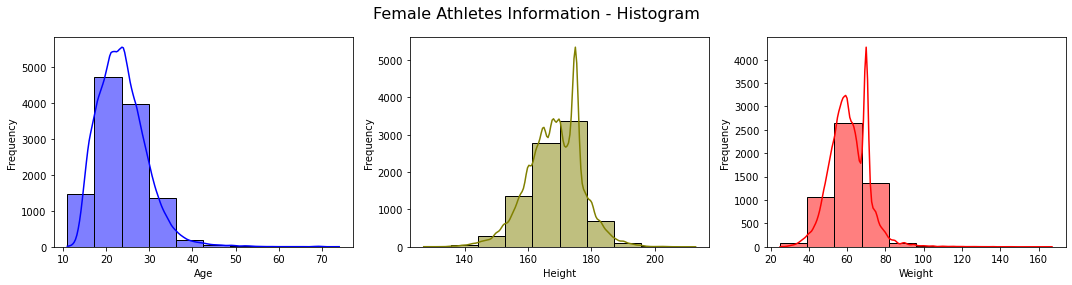

In [15]:
# Histogram for Age , Height and Weight


fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 4), ncols=3)


sns.histplot(data=games_women, x="Age", kde=True, stat="frequency", color="blue", bins=10, ax=ax1)
sns.histplot(data=games_women, x="Height", kde=True, stat="frequency",color="olive",bins=10, ax=ax2)
sns.histplot(data=games_women, x="Weight", kde=True, stat="frequency",color="red",bins=10, ax=ax3)

fig.suptitle('Female Athletes Information - Histogram', fontsize=16)

plt.tight_layout()

plt.show()

Next, it will be collected a simple random subset of women dataset of 300 observations.

In [16]:
#Random Sample of games_women

import random
random.seed(42)

k = 300
games_women_sample = games_women.sample(k).reset_index(drop=True)
games_women_sample.head()


,ID,Sex,Age,Height,Weight,NOC,Season,Medal
0,116730,F,33.0,172.0,78.0,SUI,Winter,0
1,4809,F,17.0,163.0,59.0,QAT,Summer,0
2,43103,F,24.0,170.0,62.0,RUS,Summer,0
3,71236,F,49.0,164.0,48.0,FRA,Summer,0
4,122703,F,19.0,158.0,48.0,ROU,Summer,0


In [17]:
games_women_sample.shape

(300, 8)

**Weight attribute was selected**

Women from olympic games(games_women dataset) weighted 61.1kg on average. I want to determine if the games_women_sample dataset provides strong evidence that women in olympic games weight more or less than the games_women dataset, versus the other possibility that there has been no change.   

* **H0**:The average  weight  of women in the olympic games is 61.1 kg.

* **H1**:The average  weight  of women in the olympic games is more than 61.1 kg.


The test statistic is the sample mean because n = 300> 30

In [18]:
games_women_sample.describe().round(1)

,ID,Age,Height,Weight,Medal
count,300.0,300.0,300.0,300.0,300.0
mean,71382.0,24.1,168.7,61.5,0.2
std,38757.0,6.0,8.4,10.5,0.4
min,2912.0,12.0,140.0,33.0,0.0
25%,35974.2,20.0,163.0,55.0,0.0
50%,71536.0,23.0,168.0,61.0,0.0
75%,108036.2,28.0,175.0,68.0,0.0
max,133592.0,49.0,202.0,136.0,1.0


 * x = population mean
 * mu = sample mean
 * sigma = population standard deviation
 * alpha = significance level
 * n = sample size

The critical region could be obtained by selecting a k from the sample mean, so that CR = {mu <= k} where k is such that
P (mu<=k | Ho: x = x0) = alpha =  0.05. That is under H0

Follow below the z_score table 

![z_score](z_score_table.png)

z <= (k-x) = alpha

According to the z_table, for a alpha = 0.05, the z_table is 1.64 

In [19]:
x = 61.1
alpha = 0.05
z_table = 1.64


k = x - z_table
k

59.46

The sample mean is bigger than k ( 59.8 > 58.3), thre is no strong evidence to reject H0.

#### Altenative Method

In [20]:
# Function to find z-value

def z_value(x, mu, sigma, alpha,n):
    
    ''' 
    x = population mean
    mu = sample mean
    sigma = population standard deviation
    alpha = significance level
    n = sample size
    
    '''
    
    z_value = (mu - x)/(sigma/np.sqrt(n))
    
    
    return round(z_value,3)
    


In [21]:
10.1/(np.sqrt(300))

0.583123771881522

In [22]:
x_z_score = z_value(61.1, 61.6, 10.1,0.05, 300)
x_z_score

0.857

In [23]:
from scipy.integrate import quad

def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )


x_z_score_percentile, _ = quad(normalProbabilityDensity, np.NINF, x_z_score)

print('Point Estimate Z-score Probability: ', round(x_z_score_percentile, 3))

Point Estimate Z-score Probability:  0.804


In [24]:
p_value = (1-x_z_score_percentile)
print('p-value = ', round(p_value, 5))

p-value =  0.19572


#### Conclusion

In [25]:
alpha
print('p-value ', round(p_value, 4), '>', round(alpha, 4), 'alpha value')

p-value  0.1957 > 0.05 alpha value


<div class="alert alert-success alert-success"><span style=color:DodgerBlue><b>CONCLUSIONS</b></span>
    
A large p-value indicates  **weakly evidence against** the null hypothesis H0.

We **cannot reject** the Null Hypothesis that the sample mean is equal to 61.1, at significance level equals to 0.05.</div>

#### Exercises 2

Continue with the sports theme dataset you like and select two attributes from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

**Set up a hypothesis if there is a relationship between a weight female average and gain a medal**

H0 : There is no difference if a woman gain a medal based on her weight

H1 : There is some difference if a woman gain a medal based on her weight

In [26]:
# Separate in group

women_medal = games_women_sample.groupby(['Medal'])


In [27]:
women_medal.Weight.count()

Medal
0    252
1     48
Name: Weight, dtype: int64

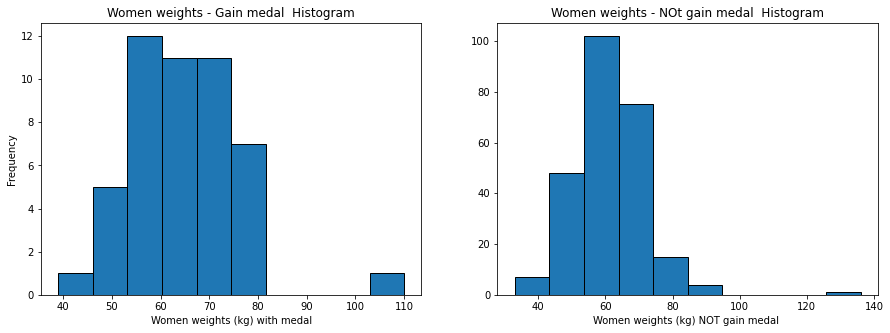

In [28]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1, 2, 1)
s_medal = games_women_sample.loc[games_women_sample['Medal'] == 1]

ax1.hist(s_medal['Weight'], edgecolor='k')
plt.title("Women weights - Gain medal  Histogram",fontsize=12)
plt.xlabel("Women weights (kg) with medal")
plt.ylabel("Frequency")

ax2 = fig.add_subplot(1, 2, 2)
s_n_medal = games_women_sample.loc[games_women_sample['Medal'] == 0]

ax2.hist(s_n_medal['Weight'], edgecolor='k')
plt.title("Women weights - NOt gain medal  Histogram",fontsize=12)
plt.xlabel("Women weights (kg) NOT gain medal ")

plt.show()

In [29]:
women_medal.mean().round(2)

,ID,Age,Height,Weight
Medal,,,,
0,72243.97,24.01,168.23,60.97
1,66856.58,24.81,171.08,64.19


In [30]:
#group_smoke.loc(['nonsmoker','weight'])

x_no_medal = games_women_sample.loc[games_women_sample['Medal'] == 0].Weight.mean()
x_medal = games_women_sample.loc[games_women_sample['Medal'] == 1].Weight.mean()

x_point_estimate = (x_medal - x_no_medal )
round(x_point_estimate,3)

3.217

In [31]:
#Compute the standard error of the point estimate of the population difference

women_medal.std().round(2)

,ID,Age,Height,Weight
Medal,,,,
0,38777.04,6.07,8.35,10.34
1,38741.01,5.30,8.36,11.21


In [32]:
se_medal = np.sqrt((10.68**2)/247 + (10.01**2)/53)
round(se_medal,2)

1.53

In [33]:
z_score_medal = (x_point_estimate-0)/se_medal
z_score_medal

2.097657669430991

In [34]:
from scipy.integrate import quad


def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x_point_estimate**2) / 2.0) )


x_z_score_percentile, _ = quad(normalProbabilityDensity, np.NINF, z_score_medal)

print('Point Estimate Z-score Probability: ', round(x_z_score_percentile, 4))

Point Estimate Z-score Probability:  -0.0023


<ipython-input-34-c52ee754fa06>:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  x_z_score_percentile, _ = quad(normalProbabilityDensity, np.NINF, z_score_medal)


In [35]:
p_value = (1-x_z_score_percentile)
print('p-value = ', round(p_value, 5))

p-value =  1.00226


<div class="alert alert-success alert-success"><span style=color:DodgerBlue><b>CONCLUSIONS</b></span>

A large p-value indicates  **weakly evidence against** the null hypothesis H0.

We **cannot reject** the Null Hypothesis that there is no difference about Weight mean between who gains and who doesn't gain medal, at significance level equals to 0.05.</div>

#### Exercises 3

Continue with the sports theme dataset you like and select three attributes from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

In [36]:
games_women_sample.head()

,ID,Sex,Age,Height,Weight,NOC,Season,Medal
0,116730,F,33.0,172.0,78.0,SUI,Winter,0
1,4809,F,17.0,163.0,59.0,QAT,Summer,0
2,43103,F,24.0,170.0,62.0,RUS,Summer,0
3,71236,F,49.0,164.0,48.0,FRA,Summer,0
4,122703,F,19.0,158.0,48.0,ROU,Summer,0


In [37]:
print(round(games_women_sample[['Age', 'Height', 'Weight']].mean(),2))

Age        24.14
Height    168.68
Weight     61.48
dtype: float64


**I would like to know if there is real difference between the age of the women according to their country**

The three country I'm going to analyse are:

* France (FRA)
* Canada (CAN)
* United States (USA)

In [44]:
women_country = games_women_sample.loc[(games_women_sample['NOC']=='FRA')| (games_women_sample['NOC']=='CAN') | (games_women_sample['NOC']=='USA')]

women_country.head()

,ID,Sex,Age,Height,Weight,NOC,Season,Medal
3,71236,F,49.0,164.0,48.0,FRA,Summer,0
5,75872,F,29.0,158.0,48.0,FRA,Winter,1
8,69280,F,22.0,178.0,64.0,FRA,Summer,0
19,23739,F,28.0,165.0,63.0,CAN,Summer,0
21,46783,F,21.0,175.0,136.0,USA,Summer,0


In [45]:
women_country.NOC.value_counts()

USA    28
CAN    14
FRA    11
Name: NOC, dtype: int64

In [47]:
women_country.groupby('NOC')[['Age']].mean().round(3)

,Age
NOC,
CAN,24.429
FRA,25.364
USA,26.500


* H0 : the age average of the three countries are the same

* H1 : the age average of the three countries are not the same

In [48]:
women_country.groupby('NOC')[['Age']].std().transpose().round(3)

NOC,CAN,FRA,USA
Age,4.767,8.88,7.671


In [49]:

import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    

In [50]:
# isolate the variables of interest

rp.summary_cont(women_country['Age']).round(3)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,53.0,25.717,7.225,0.992,23.725,27.709


In [51]:
rp.summary_cont(women_country['Age'].groupby(women_country['NOC'])).round(3)

,N,Mean,SD,SE,95% Conf.,Interval
NOC,,,,,,
CAN,14,24.429,4.767,1.274,21.676,27.181
FRA,11,25.364,8.880,2.677,19.398,31.329
USA,28,26.500,7.672,1.450,23.525,29.475


In [52]:
zstats, pvalue = stats.f_oneway(women_country['Age'][women_country['NOC'] == 'CAN'], 
                                women_country['Age'][women_country['NOC'] == 'FRA'],
                                women_country['Age'][women_country['NOC'] == 'USA'])

print('z-statistics value = ', zstats.round(3), ' p-value = ', pvalue.round(4) )

z-statistics value =  0.391  p-value =  0.6786


<div class="alert alert-success alert-success"><span style=color:DodgerBlue><b>CONCLUSIONS</b></span>

A large p-value indicates  **weakly evidence against** the null hypothesis H0, i.e, the age average of the three (Canada, France and United States) countries are the same.

We **cannot reject** the Null Hypothesis that there is no difference about Weight mean between who gains and who doesn't gain medal, at significance level equals to 0.05.</div>